<a href="https://colab.research.google.com/github/vimalraj1993/vimalraj93/blob/master/rk4_simplependulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

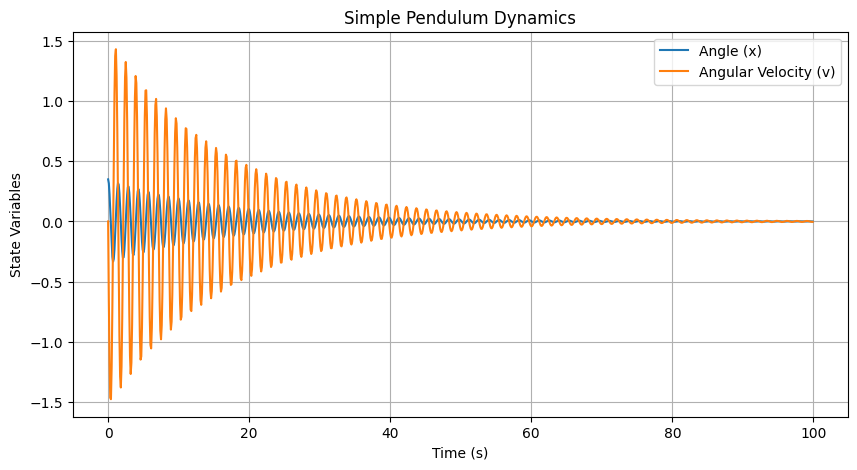

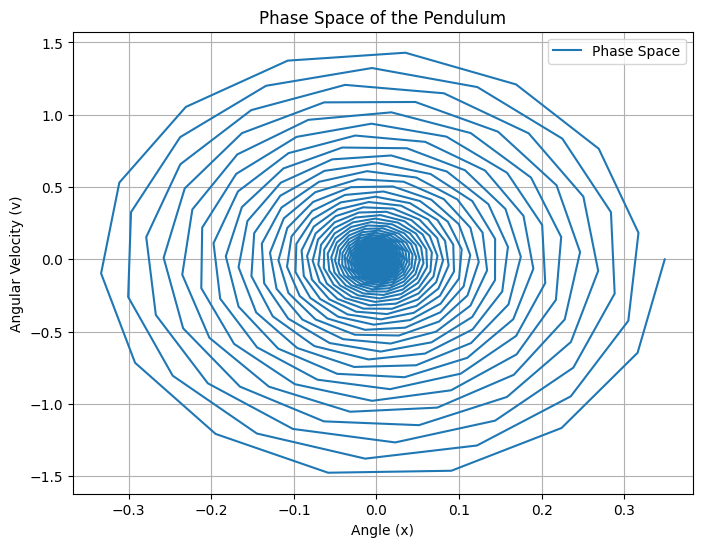

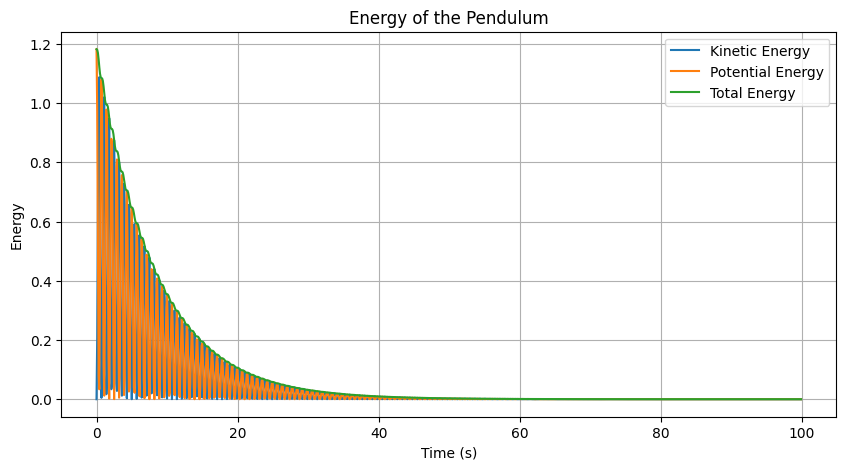

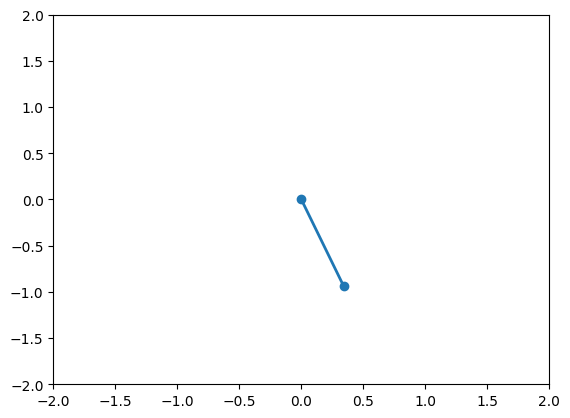

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.12  # Damping coefficient (b/m)
b = 9  # Gravitational constant
l= 0.5 #length of the pendulum (m)
dt = 0.1  # Time step
t_max = 100  # Simulation time

# Initial conditions
x0 = np.pi / 9  # Initial angle (in radians)
v0 = 0          # Initial angular velocity

# Time array
t = np.arange(0, t_max, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)

# Initial values
x[0] = x0
v[0] = v0

# Function for the ODEs
def derivatives(x, v, a, b):
    dxdt = v
    dvdt = -a * v - b/l * np.sin(x)
    return dxdt, dvdt

# RK4 Method
for i in range(1, len(t)):
    k1x, k1v = derivatives(x[i-1], v[i-1], a, b)
    k2x, k2v = derivatives(x[i-1] + 0.5 * k1x * dt, v[i-1] + 0.5 * k1v * dt, a, b)
    k3x, k3v = derivatives(x[i-1] + 0.5 * k2x * dt, v[i-1] + 0.5 * k2v * dt, a, b)
    k4x, k4v = derivatives(x[i-1] + k3x * dt, v[i-1] + k3v * dt, a, b)

    x[i] = x[i-1] + (dt / 6) * (k1x + 2*k2x + 2*k3x + k4x)
    v[i] = v[i-1] + (dt / 6) * (k1v + 2*k2v + 2*k3v + k4v)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(t, x, label="Angle (x)")
plt.plot(t, v, label="Angular Velocity (v)")
plt.xlabel("Time (s)")
plt.ylabel("State Variables")
plt.title("Simple Pendulum Dynamics")
plt.legend()
plt.grid()
plt.show()
